# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations: (described in the last section)

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

In [33]:
#Upload packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt


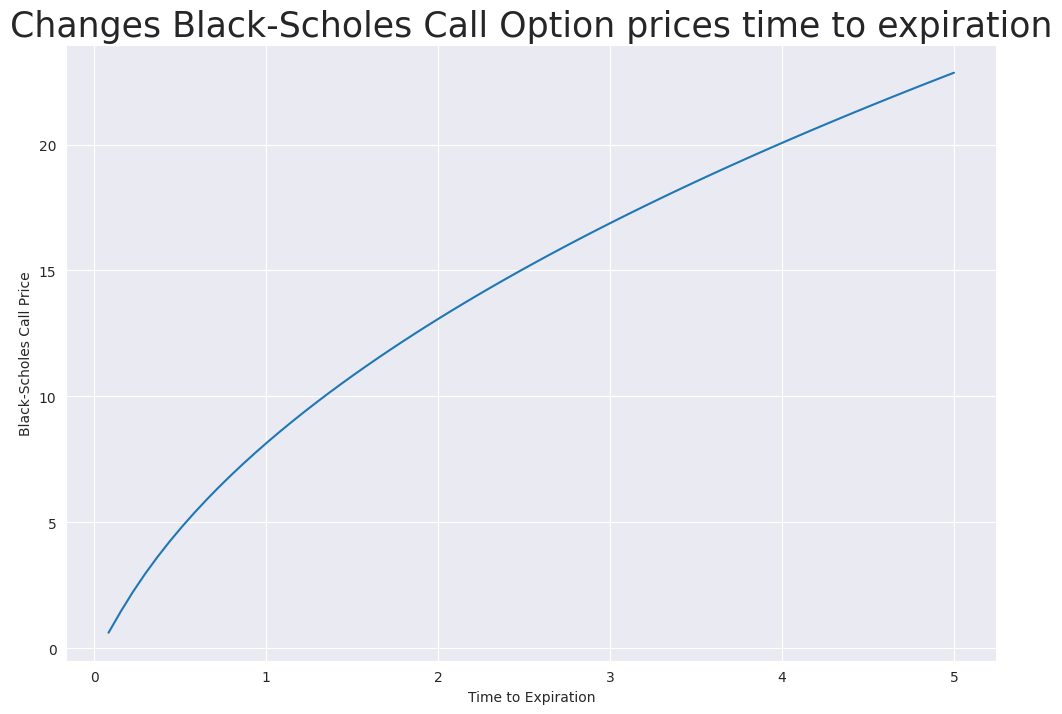

In [43]:

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

## a) Studying rate of change of the Black-Scholes call option with time

We calculate and visualize the Black-Scholes call option prices over a range of times to maturity, from a month to a year, and then compute the rate of change of the call price with respect to time. 

The rate of change is estimated using a numerical derivative, which approximates the instantaneous slope of the call price function by calculating the ratio of differences in call prices to differences in time between consecutive points

In [44]:
# Given parameters
S0 = 100             # Current stock price
K = 110              # Strike price
sigma = 0.3          # Volatility (30%)
# Generate time points ranging from 1 month (1/12 year) to 1 year
times = np.linspace(1/12, 5, 400)

# Compute Black-Scholes call option prices for each time to maturity
call_prices = [bs_call(S0, K, sigma, t=times[i]) for i in range(len(times))]

# Convert list of call prices and times into numpy arrays for vectorized operations
call_prices = np.array(call_prices)
times = np.array(times)

# Calculate the discrete rate of change of call price with respect to time (numerical derivative)
rate_of_change = np.diff(call_prices) / np.diff(times)

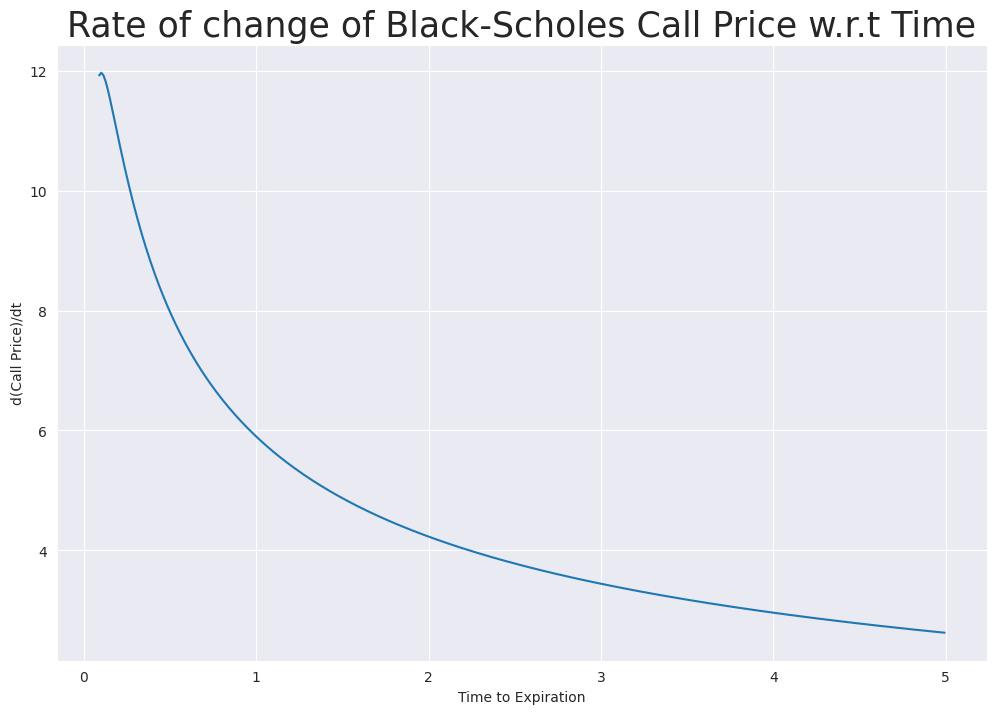

In [45]:
# Calculate mid-points between consecutive time values for plotting derivative values
mid_times = (times[:-1] + times[1:]) / 2


#Visualize the rate of change of call price w.r.t. time
plt.figure(figsize=(12,8))
plt.title('Rate of change of Black-Scholes Call Price w.r.t Time', size=25)
plt.plot(mid_times, rate_of_change)
plt.xlabel('Time to Expiration')
plt.ylabel('d(Call Price)/dt')
plt.show()

## b) Studying rate of change of the Black-Scholes call option with spot price, S(0)

We compute the time-based rate of change of call option prices for various spot prices S(0) from 80 to 120, for strike price K=100. We compute the rate of change with same method as given in previous section

In [46]:
# Given parameters
K = 100              # Strike price
sigma = 0.3          # Volatility 

# Generate spot price (S0) values ranging from 80 to 120
S0_values = np.linspace(80, 120, 9)

# Generate time points ranging from 1 month to 5 years
times = np.linspace(1/12, 5, 400)

# Calculate mid-points between consecutive time values for aligning derivative values
mid_times = (times[:-1] + times[1:]) / 2

# Initialize empty dictionary to store rate of change data for each spot price
data = {}

# Loop over each initial stock price S0
for S0 in S0_values:
    # Calculate call option prices across all time points for current S0
    call_prices = [bs_call(S0, K, sigma, T) for T in times]
    call_prices = np.array(call_prices)
    times = np.array(times)

    # Calculate numerical derivative (rate of change of call price with respect to time)
    rate_of_change = np.diff(call_prices) / np.diff(times)

    # Store rate of change in dictionary with key indicating the spot price
    data[f'S0={S0}'] = rate_of_change

# Convert dictionary into pandas DataFrame with mid_times as the index
df = pd.DataFrame(data, index=mid_times)
df.index.name = 'Time to maturity'

# Display the resulting DataFrame
print(df)

                   S0=80.0   S0=85.0   S0=90.0    S0=95.0   S0=100.0  \
Time to maturity                                                       
0.089495          0.813128  3.571052  9.510902  16.546076  19.995112   
0.101817          1.107116  4.083326  9.693339  15.819734  18.741010   
0.114140          1.401457  4.506166  9.773915  15.172342  17.696373   
0.126462          1.685692  4.852402  9.787051  14.592866  16.808644   
0.138784          1.953770  5.134525  9.755119  14.071447  16.042059   
...                    ...       ...       ...        ...        ...   
4.944549          2.152920  2.278249  2.384978   2.473762   2.545540   
4.956871          2.150243  2.275268  2.381756   2.470361   2.542022   
4.969194          2.147575  2.272297  2.378544   2.466972   2.538516   
4.981516          2.144915  2.269336  2.375344   2.463595   2.535023   
4.993839          2.142264  2.266385  2.372155   2.460231   2.531542   

                   S0=105.0   S0=110.0  S0=115.0  S0=120.0  
Ti

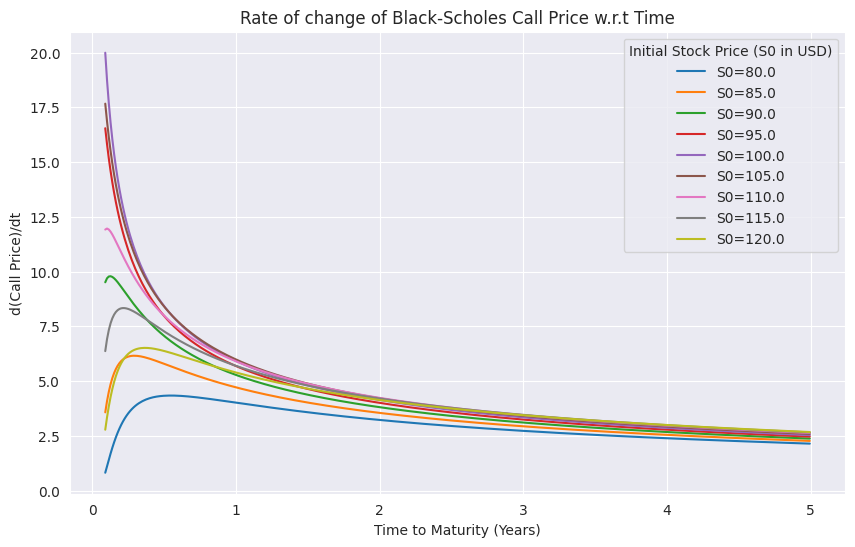

In [47]:
#Visualize the rate of change of call price w.r.t. time for different spot prices

plt.figure(figsize=(10,6))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time to Maturity (Years)')
plt.ylabel('d(Call Price)/dt')
plt.title('Rate of change of Black-Scholes Call Price w.r.t Time')
plt.legend(title='Initial Stock Price (S0 in USD)')
plt.grid(True)
plt.show()

## c) Studying rate of change of the Black-Scholes put option

Same analyses as section (a) but now for put prices

In [48]:
# Given parameters
S0 = 100             # Current stock price
K = 110              # Strike price
sigma = 0.3          # Volatility (30%)
# Generate time points ranging from 1 month (1/12 year) to 1 year
times = np.linspace(1/12, 5, 400)

# Compute Black-Scholes put option prices for each time to maturity
put_prices = [bs_call(S0, K, sigma, t=times[i]) for i in range(len(times))]

# Convert list of put prices and times into numpy arrays for vectorized operations
put_prices = np.array(put_prices)
times = np.array(times)

# Calculate the discrete rate of change of put price with respect to time (numerical derivative)
rate_of_change = np.diff(put_prices) / np.diff(times)

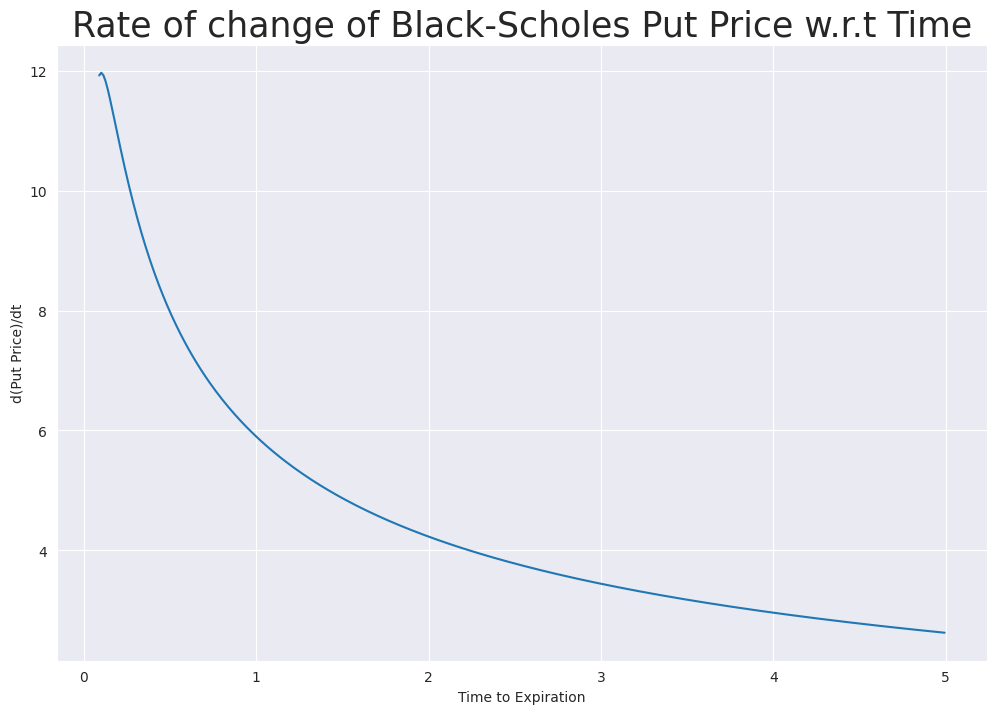

In [49]:
# Calculate mid-points between consecutive time values for plotting derivative values
mid_times = (times[:-1] + times[1:]) / 2


#Visualize the rate of change of call price w.r.t. time
plt.figure(figsize=(12,8))
plt.title('Rate of change of Black-Scholes Put Price w.r.t Time', size=25)
plt.plot(mid_times, rate_of_change)
plt.xlabel('Time to Expiration')
plt.ylabel('d(Put Price)/dt')
plt.show()

## c) Studying rate of change of the Black-Scholes put option with spot price, S(0)

Same analyses as section (b) but now for put prices

In [50]:
# Given parameters

K = 100              # Strike price
# Generate spot price (S0) values ranging from 80 to 120
S0_values = np.linspace(80, 120, 9)

# Generate time points ranging from 1 month to 5 years
times = np.linspace(1/12, 5, 400)

# Calculate mid-points between consecutive time values for aligning derivative values
mid_times = (times[:-1] + times[1:]) / 2

# Initialize empty dictionary to store rate of change data for each spot price
data = {}

# Loop over each initial stock price S0
for S0 in S0_values:
    # Calculate put option prices across all time points for current S0
    put_prices = [bs_put(S0, K, sigma, T) for T in times]
    put_prices = np.array(put_prices)
    times = np.array(times)

    # Calculate numerical derivative (rate of change of put price with respect to time)
    rate_of_change = np.diff(put_prices) / np.diff(times)

    # Store rate of change in dictionary with key indicating the spot price
    data[f'S0={S0}'] = rate_of_change

# Convert dictionary into pandas DataFrame with mid_times as the index
df = pd.DataFrame(data, index=mid_times)
df.index.name = 'Time to maturity'

# Display the resulting DataFrame
print(df)

                   S0=80.0   S0=85.0   S0=90.0    S0=95.0   S0=100.0  \
Time to maturity                                                       
0.089495          0.813128  3.571052  9.510902  16.546076  19.995112   
0.101817          1.107116  4.083326  9.693339  15.819734  18.741010   
0.114140          1.401457  4.506166  9.773915  15.172342  17.696373   
0.126462          1.685692  4.852402  9.787051  14.592866  16.808644   
0.138784          1.953770  5.134525  9.755119  14.071447  16.042059   
...                    ...       ...       ...        ...        ...   
4.944549          2.152920  2.278249  2.384978   2.473762   2.545540   
4.956871          2.150243  2.275268  2.381756   2.470361   2.542022   
4.969194          2.147575  2.272297  2.378544   2.466972   2.538516   
4.981516          2.144915  2.269336  2.375344   2.463595   2.535023   
4.993839          2.142264  2.266385  2.372155   2.460231   2.531542   

                   S0=105.0   S0=110.0  S0=115.0  S0=120.0  
Ti

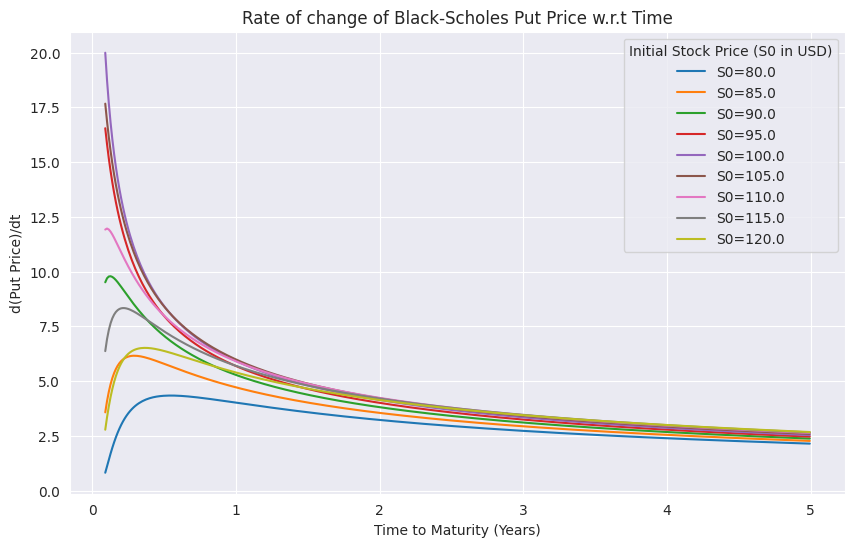

In [52]:
# Visualize the rate of change of put price w.r.t. time for different spot prices

plt.figure(figsize=(10,6))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time to Maturity (Years)')
plt.ylabel('d(Put Price)/dt')
plt.title('Rate of change of Black-Scholes Put Price w.r.t Time')
plt.legend(title='Initial Stock Price (S0 in USD)')
plt.grid(True)
plt.show()

## Observations


### Option – Time Sensitivity
The rate of change of the Black-Scholes call option price with respect to time is highest when the time to expiration is very short. As time to expiration increases, the rate of change decreases significantly, indicating that the option price becomes less sensitive to time as maturity lengthens. This reflects the typical behavior of time decay (theta) where the option price erodes more rapidly as expiration approaches.

### Call Option – Spot Price Sensitivity:
The time sensitivity of the call option is greatest when the spot price is near the strike price (100 in USD), showing the highest rate of change. For spot prices significantly below or above the strike, the rate of change generally decreases. When the spot price is significantly below the strike (e.g., 80 or 85), the rate of change is lower, reflecting a lower likelihood of the option finishing in-the-money. Similarly, when the spot price is well above the strike (e.g., 115 or 120), the rate of change also decreases as the option behaves more like the underlying asset and time sensitivity diminishes.

However, noticeable peaks occur at certain out-of-the-money (e.g., 80, 85) and slightly in-the-money (e.g., 110, 115) spot prices early in the time frame. These peaks arise because the option’s time sensitivity initially increases as the probability of finishing in-the-money changes, reflecting transitional dynamics in option value as it moves between out-of-the-money and in-the-money states.


### Put Option – Time Sensitivity 
The rate of change of the put option price with respect to time is highest when the time to expiration is short, and it steadily decreases as the expiration date extends. This indicates that, similar to call options, put options experience the greatest time sensitivity (theta) as they near expiration. The price of the put option decays more rapidly when there is less time remaining, reflecting the accelerating impact of time decay as expiration approaches.

### Put Option – Spot Price Sensitivity: 
The rate of change of the put option price with respect to time is highest when the spot price is near the strike price (100 in USD), displaying the greatest sensitivity around this level. For spot prices significantly below the strike (deep in-the-money puts, e.g., 80, 85) or far above the strike (deep out-of-the-money puts, e.g., 115, 120), the rate of change generally decreases.

However, noticeable peaks occur early on for spot prices both well below and slightly above the strike. These peaks arise because when the option is out-of-the-money or near-the-money, the time sensitivity initially increases due to changing probabilities of finishing in-the-money as time progresses. This transitional behavior causes the option’s time decay rate to momentarily rise before gradually declining.

